In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  1.8  80.5 ...  2.7  0.9  0.0]
 [ 0.0  4.6  239.2 ...  4.9  0.9  0.0]
 [ 0.0  16.4  1199.6 ...  3.9  1.0  0.0]
 ...
 [ 0.0  13.4  1030.7 ...  3.9  1.0  0.0]
 [ 0.0  9.6  700.2 ...  4.4  1.0  0.0]
 [ 0.0  4.6  459.4 ...  5.4  0.9  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 0.0  80.5  9.0 ...  0.1  0.6  2.7]
 [ 0.0  239.2  15.5 ...  0.1  0.5  4.9]
 [ 0.0  1199.6  34.6 ...  0.1  0.5  3.9]
 ...
 [ 0.0  1030.7  32.1 ...  0.1  0.6  3.9]
 [ 0.0  700.2  26.5 ...  0.1  0.5  4.4]
 [ 0.0  459.4  21.4 ...  0.1  0.6  5.4]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 9ms/step - loss: 149.7261 - accuracy: 0.5486 - val_loss: 111.8924 - val_accuracy: 0.5656
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 96.8208 - accuracy: 0.5573 - val_loss: 73.7281 - val_accuracy: 0.5691
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 64.5029 - accuracy: 0.5733 - val_loss: 47.1460 - val_accuracy: 0.5842
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 38.7761 - accuracy: 0.5714 - val_loss: 25.6884 - val_accuracy: 0.5904
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 18.7341 - accuracy: 0.5702 - val_loss: 9.8395 - val_accuracy: 0.5957
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 5.1574 - accuracy: 0.5273 - val_loss: 1.2830 - val_accuracy: 0.4397
Epoch 7/500
83/83 [==============================] - 0s 5ms/step - loss: 0.8346 - accuracy: 0.4423 - val_loss: 0.7459 - val_accuracy: 0.4379
Ep

Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9070 - val_loss: 0.2088 - val_accuracy: 0.9317
Epoch 60/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9119 - val_loss: 0.3140 - val_accuracy: 0.8768
Epoch 61/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9157 - val_loss: 0.1956 - val_accuracy: 0.9379
Epoch 62/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.9184 - val_loss: 0.2769 - val_accuracy: 0.8892
Epoch 63/500
83/83 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9161 - val_loss: 0.2178 - val_accuracy: 0.8980
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9150 - val_loss: 0.2054 - val_accuracy: 0.9335
Epoch 65/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9195 - val_loss: 0.2023 - val_accuracy: 0.9317
Epoch 

83/83 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.9518 - val_loss: 0.4134 - val_accuracy: 0.8271
Epoch 117/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9548 - val_loss: 0.1035 - val_accuracy: 0.9672
Epoch 118/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1270 - accuracy: 0.9544 - val_loss: 0.0996 - val_accuracy: 0.9707
Epoch 119/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9525 - val_loss: 0.1320 - val_accuracy: 0.9619
Epoch 120/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9506 - val_loss: 0.1429 - val_accuracy: 0.9548
Epoch 121/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1254 - accuracy: 0.9552 - val_loss: 0.1349 - val_accuracy: 0.9566
Epoch 122/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1332 - accuracy: 0.9541 - val_loss: 0.1946 - val_accuracy: 0.9273
Epoch 123/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1050 - accuracy: 0.9605 - val_loss: 0.1146 - val_accuracy: 0.9539
Epoch 174/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9647 - val_loss: 0.2014 - val_accuracy: 0.9184
Epoch 175/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9601 - val_loss: 0.1817 - val_accuracy: 0.9317
Epoch 176/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9598 - val_loss: 0.1852 - val_accuracy: 0.9326
Epoch 177/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0949 - accuracy: 0.9685 - val_loss: 0.0890 - val_accuracy: 0.9654
Epoch 178/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.9685 - val_loss: 0.0740 - val_accuracy: 0.9770
Epoch 179/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0998 - accuracy: 0.9647 - val_loss: 0.1094 - val_accuracy: 0.9566
Epoch 180/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9655 - val_loss: 0.0731 - val_accuracy: 0.9805
Epoch 231/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0952 - accuracy: 0.9677 - val_loss: 0.0697 - val_accuracy: 0.9752
Epoch 232/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0936 - accuracy: 0.9696 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 233/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.0640 - val_accuracy: 0.9778
Epoch 234/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0902 - accuracy: 0.9700 - val_loss: 0.0755 - val_accuracy: 0.9787
Epoch 235/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0872 - accuracy: 0.9711 - val_loss: 0.1421 - val_accuracy: 0.9486
Epoch 236/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9670 - val_loss: 0.1024 - val_accuracy: 0.9574
Epoch 237/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0879 - accuracy: 0.9715 - val_loss: 0.0633 - val_accuracy: 0.9778
Epoch 288/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0815 - accuracy: 0.9723 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 289/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0902 - accuracy: 0.9689 - val_loss: 0.2130 - val_accuracy: 0.9273
Epoch 290/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0868 - accuracy: 0.9700 - val_loss: 0.0715 - val_accuracy: 0.9743
Epoch 291/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9723 - val_loss: 0.3682 - val_accuracy: 0.8723
Epoch 292/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9708 - val_loss: 0.0606 - val_accuracy: 0.9778
Epoch 293/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9723 - val_loss: 0.0635 - val_accuracy: 0.9823
Epoch 294/500

83/83 [==============================] - 0s 6ms/step - loss: 0.0843 - accuracy: 0.9730 - val_loss: 0.4350 - val_accuracy: 0.8626
Epoch 345/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0915 - accuracy: 0.9689 - val_loss: 0.0547 - val_accuracy: 0.9840
Epoch 346/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0889 - accuracy: 0.9670 - val_loss: 0.0569 - val_accuracy: 0.9787
Epoch 347/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0833 - accuracy: 0.9711 - val_loss: 0.0998 - val_accuracy: 0.9637
Epoch 348/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0836 - accuracy: 0.9715 - val_loss: 0.0743 - val_accuracy: 0.9734
Epoch 349/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0809 - accuracy: 0.9723 - val_loss: 0.0562 - val_accuracy: 0.9796
Epoch 350/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0839 - accuracy: 0.9719 - val_loss: 0.0878 - val_accuracy: 0.9690
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.9711 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 402/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9696 - val_loss: 0.0578 - val_accuracy: 0.9787
Epoch 403/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0913 - accuracy: 0.9708 - val_loss: 0.0664 - val_accuracy: 0.9761
Epoch 404/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9738 - val_loss: 0.1550 - val_accuracy: 0.9415
Epoch 405/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0821 - accuracy: 0.9692 - val_loss: 0.0550 - val_accuracy: 0.9805
Epoch 406/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9692 - val_loss: 0.0707 - val_accuracy: 0.9752
Epoch 407/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9674 - val_loss: 0.0533 - val_accuracy: 0.9823
Epoch 408/500

83/83 [==============================] - 1s 10ms/step - loss: 0.0857 - accuracy: 0.9708 - val_loss: 0.0525 - val_accuracy: 0.9832
Epoch 459/500
83/83 [==============================] - 1s 12ms/step - loss: 0.0778 - accuracy: 0.9742 - val_loss: 0.0529 - val_accuracy: 0.9858
Epoch 460/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0829 - accuracy: 0.9730 - val_loss: 0.0647 - val_accuracy: 0.9761
Epoch 461/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0826 - accuracy: 0.9730 - val_loss: 0.0566 - val_accuracy: 0.9814
Epoch 462/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0897 - accuracy: 0.9696 - val_loss: 0.0609 - val_accuracy: 0.9778
Epoch 463/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0834 - accuracy: 0.9715 - val_loss: 0.0637 - val_accuracy: 0.9787
Epoch 464/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0832 - accuracy: 0.9708 - val_loss: 0.0633 - val_accuracy: 0.9778
Epoch 465/5

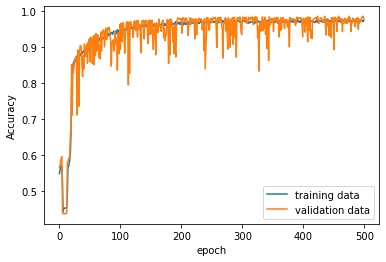

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 1s 5ms/step - loss: 0.0679 - accuracy: 0.9776


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9778


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]
83/83 [==============================] - 1s 4ms/step
[[ 1.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9956178790534619
0.9546218487394958
0.9746889746889746


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]
36/36 [==============================] - 0s 4ms/step
[[ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9936708860759493
0.9553752535496958
0.9741468459152016
